In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [105]:
df1= pd.read_csv(r'C:/Users/harshit/Desktop/Corona-project/covid_19_data.csv')
df3= pd.read_csv(r'C:/Users/harshit/Desktop/Corona-project/COVID19_open_line_list.csv')
df2= pd.read_csv(r'C:/Users/harshit/Desktop/Corona-project/COVID19_line_list_data.csv')

In [106]:
df= pd.read_excel(r'C:/Users/harshit/Desktop/Corona-project/Covid_India.xlsx')

In [107]:
df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']
total_cases=df['Total cases'].sum()
print('The total number of cases till now in India is',total_cases)

The total number of cases till now in India is 729


In [29]:
India_coord = pd.read_excel(r'C:/Users/harshit/Desktop/Corona-project/Indian Coordinates.xlsx')
dbd_India = pd.read_excel(r'C:/Users/harshit/Desktop/Corona-project/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel(r'C:/Users/harshit/Desktop/Corona-project/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel(r'C:/Users/harshit/Desktop/Corona-project/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel(r'C:/Users/harshit/Desktop/Corona-project/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

# TOTAL CASES IN INDIA

---



In [130]:
df.style.background_gradient(cmap='Blues')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


# TOTAL ACTIVE CASES

In [140]:
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 648


,Total Active
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


# VISUALISING THE SPREADS GEOGRAPHICALLY

In [138]:
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.35, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.2 ).add_to(map)
map

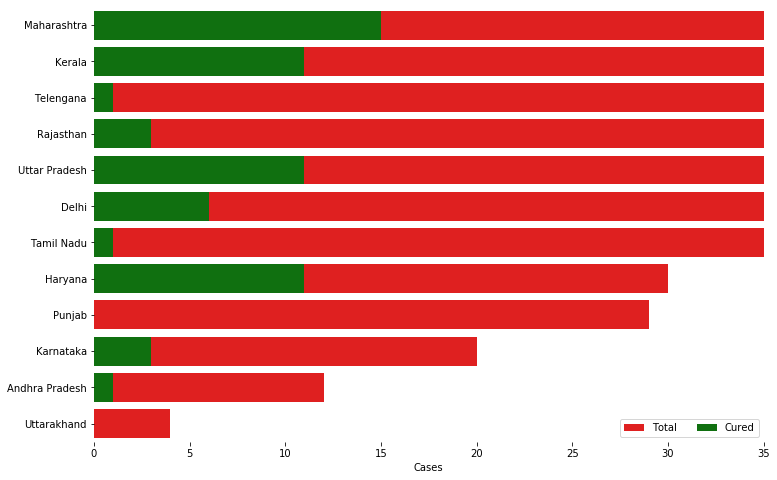

In [33]:
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="red")
sns.set_color_codes("muted")data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAwkAAAHgCAYAAADuTyHvAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzde5xdVX338c9XggnIJSMqilAntXgBEgIEiuWiiFqgWqUKSKmSekFtfZT4oNJaMWhrLdp6QauNVZGWFh9EA4V6QQTlokBMAgFEvAxWkIqARlCIEH7PH2dHzx4ml0lmzpnMfN6v17xmn7XXWnud5cGc71lrz0lVIUmSJElrPKLfA5AkSZI0sRgSJEmSJLUYEiRJkiS1GBIkSZIktRgSJEmSJLUYEiRJkiS1TOv3AKYw//asJEmSeiGjbeBKgiRJkqQWQ4IkSZKkFkOCJEmSpBbvSeiTgQUD/R6CpClo2eKZ/R6CJKnHBoeGRt3GlQRJkiRJLYYESZIkSS2GBEmSJEkthgRJkiRJLYYESZIkSS2GBEmSJEkthgRJkiRJLYYESZIkSS2GBEmSJEktPQkJSSrJv3U9npbkp0kuWE+7+Uk+PP4jXP/1kvx1r8YhSZIk9VOvVhJ+CeyRZKvm8XOB28b7okm2GMPuRgwJ6XBFRpIkSZNGL9/cfgH4o+b4WOA/15xIsl+SK5Msa34/tavdTkm+mOS7SU7ravPRJEuS3JDk1K7yW5KckuRy4Kgkr05yTZJrk5ybZOum3lFJrm/Kv76u6yV5D7BVkuVJzkoymOTbSf4ZWArssrbxSJIkSZubXoaEs4GXJpkBzAGu6jp3E3BwVe0FnAK8u+vcXOAYYDZwTJJdmvK3VdW8pq9nJpnT1eb+qjqwqs4GPldV+1bVnsC3gVc2dU4B/rAp/+N1Xa+qTgbuq6q5VXVcU++pwJlVtVdV/XA945EkSZI2Gz0LCVV1HTBIZxXhv4ed3h44J8n1wPuB3bvOXVxVK6vqfuBG4ElN+dFJlgLLmvq7dbX5TNfxHkkuS7ICOK6r7yuAM5K8GujelrS26w33w6r6ZtfjdY0HgCQnNKsNS1atWLWWbiVJkqT+6vVe+vOB99G11ajxLuCSqtoDeAEwo+tc97vp1cC0JLOAk4BDq2oOcOGwNr/sOj4DeH1VzQZOXVOvql4L/A2wC7A8yQ5ru95anstvrrEB46G55qKqmldV86bPnr6WbiVJkqT+6nVI+CTwzqpaMax8e357I/P8DehnOzpv0lcm2RE4fB11twVuT7IlnZUEAJI8uaquqqpTgDvphIV1eaDpY1PHI0mSJE1oPQ0JVXVrVX1whFOnAX+f5AraW3/W1s+1dLb13EAneFyxjupvp3P/w0V07n1Y471JVjRbnL4OXLueyy4Crkty1iaOR5IkSZrQUlX9HsOUNLBgwImX1HPLFs/s9xAkST02ODSU0bbx7/tLkiRJajEkSJIkSWoxJEiSJElqMSRIkiRJajEkSJIkSWoxJEiSJElqMSRIkiRJajEkSJIkSWoxJEiSJElqMSRIkiRJaklV9XsMU5UTL0mSpF7IaBu4kiBJkiSpxZAgSZIkqcWQIEmSJKnFkCBJkiSpxZAgSZIkqcWQIEmSJKllWr8HMFUNLBjo9xCkzd6yxTP7PQRJkia8waGhUbdxJUGSJElSiyFBkiRJUoshQZIkSVKLIUGSJElSiyFBkiRJUoshQZIkSVKLIUGSJElSiyFBkiRJUoshQZIkSVKLIUGSJElSy6QPCUnu7To+Isl3k/zOGPQ7mOT6Te1HkiRJmmgmfUhYI8mhwOnAYVX1PxvYZtr4jkqSJEmaeKZESEhyEPBx4I+q6vtN2WOTnJvkmubngKZ8YZJFSb4MnNmsGFyWZGnz8wcj9L/eOpIkSdLmYip8Uj4dOA94VlXd1FX+QeD9VXV5s/3oS8DTm3P7AAdW1X1JtgaeW1X3J9kV+E9g3rBr3LEBdUhyAnACwFaHbsX02dPH7llKkiRJY2QqhIQHgCuBVwJv7Cp/DrBbkjWPt0uybXN8flXd1xxvCXw4yVxgNfCUEa6xIXWoqkXAIoCBBQO10c9IkiRJGkdTISQ8BBwNfCXJX1fVu5vyRwDP6AoDADSh4ZddRQuAnwB7Nm3uH+EaG1JHkiRJ2ixMiXsSqupXwPOB45K8sin+MvD6NXWaVYCRbA/cXlUPAS8DttjIOpIkSdJmYUqEBICquhs4DPibJC8E3gDMS3JdkhuB166l6T8Dxyf5Jp1tRL/cyDqSJEnSZiFVbo3vB+9JkDbdssUz+z0ESZImvMGhoay/VtuUWUmQJEmStGEMCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWvzG5f5x4iVJktQLfuOyJEmSpE1jSJAkSZLUYkiQJEmS1GJIkCRJktRiSJAkSZLUYkiQJEmS1DKt3wOYqgYWDIxZX8sWzxyzviRJkjS5DA4NjbqNKwmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWqb1ewBrJNkBuLh5+HhgNfDT5vF+VfXrEdrcCuxRVT/vzSglSZKkyW/ChISquguYC5BkIXBvVb2vr4OSJEmSpqDNYrtRkuOTXJ1keZJ/TvKwcY9UJ8m0JD9P8p4k1yb5RpLHNfV3TXJV0+ZdSX7elG+X5KtJlia5Lsnzm/LfS3J9kk8kuSHJF5LMaM69Nsk1zTXOSbJVL+dHkiRJGksTPiQk2QM4EviDqppLZ/XjpaOosz3wtaraE/gG8Iqm/HTgfVW1H/CTru7uA15YVXsDzwHe33XuqcAHqmr3pt6LmvJzqmrf5hrfB+Zv8hOXJEmS+mTCbDdah+cA+wJLkgBsBfxoFHXuq6ovNMffAg5qjn8fOKI5/g/gb5vjAP+Q5EDgIWCXJI9pzn2vqlZ09TXYHM9J8k5gJrAtcMFITyTJCcAJAFsduhXTZ0/fgKcvSZIk9dbmEBICfLKq3j7aOkmmAd03PK9m/c/55XRWH/auqgebm6NnNOdWraWvM4HDq+r6JK8C9h+p46paBCwCGFgwUOsZhyRJktQXE367EfAV4Og1n+Yn2SHJ72xEneGuprNFCdrbl7YH7mgCwnOBJ27AGB8F/G+SLYE/3YD6kiRJ0oQ14UNCs73nVOArSa4DvgzsONo6I3gD8NYkVwOPA1Y25f8G/EGSJcBRwHc3YJin0AkdFwE3bsjzkiRJkiaqVE3NXS9JHgX8qqoqyZ8BR1bVi3t1/bHcbrRs8cyx6kqSJEmTzODQUEbbZnO4J2G87At8oPlzqj8D/rzP45EkSZImhCkbEqrqUpovb5MkSZL0WxP+ngRJkiRJvWVIkCRJktRiSJAkSZLUYkiQJEmS1GJIkCRJktRiSJAkSZLUYkiQJEmS1DJlv3F5AnDiJUmS1Auj/sZlVxIkSZIktRgSJEmSJLUYEiRJkiS1GBIkSZIktRgSJEmSJLUYEiRJkiS1TOv3AKaqgQUD/R7CuFu2eGa/hyBJkjTlDQ4NjbqNKwmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWiZsSEiyOsnyJNcn+a8kMzegzZUbea0Tk2zd9fjejelHkiRJmgwmbEgA7ququVW1B3A38Jfra1BVf7CR1zoR2Hq9tSRJkqQpYCKHhG7fAJ4IkGSbJBcnWZpkRZIXrqm0ZgVgbXWSPCrJhUmubVYojknyBmAn4JIkl3T19XdNvW8m2bEpe0GSq5IsS/KVrvKFST6Z5NIkP2j6lCRJkjZLEz4kJNkCOBQ4vym6HziyqvYGDgH+MUmGNVtbncOAH1fVns0KxRer6kPAj4FDquqQpv2jgG9W1Z7A14FXN+WXA/tX1V7A2cBbuq75NOAPgf2AdyTZcoymQJIkSeqpiRwStkqyHLgLeDRwUVMe4N1JrgO+QmeFYcdhbddWZwXwnCT/kOSgqlq5lmv/GrigOf4WMNgc7wx8KckK4M3A7l1tLqyqVVV1J3DHCGMiyQlJliRZsmrFqg2aBEmSJKnXJnJIuK+q5gJPAh7Jb+9JOA54LLBPc/4nwIxhbUesU1U3A/vQCQt/n+SUtVz7gaqq5ng1MK05Ph34cFXNBl4z7Lrd7/q72/xGVS2qqnlVNW/67OnrfvaSJElSn0zkkABA82n/G4CTmi082wN3VNUDSQ6hEyKGG7FOkp2AX1XVvwPvA/Zu6t8DbLsBw9keuK05Pn5jn5MkSZI0kT3s0+6JqKqWJbkWeClwFvBfSZYAy4Gbuqs2v9dWZzbw3iQPAQ8Ar2vKFwFfSHJ7130JI1kInJPkNuCbwKxNfnKSJEnSBJPf7qrZvCXZAVhaVSOtLEw4AwsGJsfEr8Oyxev9agtJkiSNs8GhoeF/5Ge9Jvx2ow3RbCP6Bp0tRJIkSZI2wWax3Wh9qurHwFP6PQ5JkiRpMpgUKwmSJEmSxo4hQZIkSVKLIUGSJElSiyFBkiRJUoshQZIkSVKLIUGSJElSiyFBkiRJUsuk+cblzZATL0mSpF6Ymt+4LEmSJGnsGBIkSZIktRgSJEmSJLUYEiRJkiS1GBIkSZIktRgSJEmSJLUYEiRJkiS1TOv3AKaqgQUD/R6CtNlbtnhmv4cgSdKENzg0NOo2riRIkiRJajEkSJIkSWoxJEiSJElqMSRIkiRJajEkSJIkSWoxJEiSJElqMSRIkiRJajEkSJIkSWoxJEiSJElqGbOQkGQwyfXDyhYmOak5np9kp65zJybZehOvuTDJbUmWJ7k+yR9vYn+XJpm3Ee3OSPKSTbm2JEmSNFH0ciVhPrBT1+MTgVGFhCRbjFD8/qqaCxwFfDLJI4a1mTbKcUqSJElTWk9CQvMp+zzgrOZT/zfSCQyXJLmkqfPRJEuS3JDk1K62tyQ5JcnldILAiKrq28CDwGOaT/b/qen7H5Lsl+TKJMua309t+t4qydlJrkvyGWCrrus+L8k3kixNck6SbZry9yS5sWnzvq4hHNz0/QNXFSRJkrQ568mn7FX12SSvB06qqiUASRYAh1TVnU21t1XV3c1qwcVJ5lTVdc25+6vqwHVdI8nvAw8BP22KngI8p6pWJ9kOOLiqHkzyHODdwIuB1wG/qqo5SeYAS5u+HgP8TdP+l0neCrwpyYeBI4GnVVUlmdk1hCcABwJPA84HPruR0yVJkiT11ViGhBpl+XBHJzmBzpieAOwGrAkJn1lHuwVJ/gy4BzimefMOcE5VrW7qbA98OsmuzXi2bMoPBj4EUFXXJVlzvf2b61/R9PVI4BvAL4D7gX9NciFwQdc4FlfVQ8CNSXYcaaDN8zsBYKtDt2L67OnrmRJJkiSp98YyJNwFDAwrezQwtL6GSWYBJwH7VtXPkpwBzOiq8st1NH9/Vb1vhPLuNu8CLqmqI5MMApd2nRspxAS4qKqOHWGs+wGHAi8FXg88uzm1alj7h6mqRcAigIEFAxsaniRJkqSeGrN7EqrqXuD2JIcCJHk0cBhweVPlHmDbribdj7ej86Z+ZfMp/OFjNa7G9sBtzfH8rvKvA8c1490DmNOUfxM4IMnvNee2TvKU5r6E7avqv+nceD13jMcpSZIk9d1Y35PwcuAjSf6xeXxqVX2/OT4D+FiS+4Bn0PlE/QtJbq+qQ5IsA24AfgBcMcbjOo3OdqM3AV/tKv8o8Klmm9Fy4GqAqvppkvnAfyZZsyfob+gEm/OSzKCzWrBgjMcpSZIk9V2q3PXSD243kjbdssUz119JkqQpbnBoaMSt8OviNy5LkiRJajEkSJIkSWoxJEiSJElqMSRIkiRJajEkSJIkSWoxJEiSJElqMSRIkiRJajEkSJIkSWoxJEiSJElq8RuX+8eJlyRJUi/4jcuSJEmSNo0hQZIkSVKLIUGSJElSiyFBkiRJUoshQZIkSVKLIUGSJElSiyFBkiRJUsu0fg9gqhpYMNDvIWiMLFs8s99DkCRJWqvBoaFRt3ElQZIkSVKLIUGSJElSiyFBkiRJUoshQZIkSVKLIUGSJElSiyFBkiRJUoshQZIkSVKLIUGSJElSiyFBkiRJUoshQZIkSVLLlA0JSVYnWZ7khiTXJnlTknXOR5LBJNc3x/OTfHgt9f47yczxGLckSZI03qb1ewB9dF9VzQVI8jjgP4DtgXdsasdVdcSm9iFJkiT1y5RdSehWVXcAJwCvT8cWSd6b5Jok1yV5zVqa7pTki0m+m+S0NYVJbknymJ4MXpIkSRpjhoRGVf2Aznw8DnglsLKq9gX2BV6dZNYIzeYCxwCzgWOS7LKuayQ5IcmSJEtWrVg1tk9AkiRJGiOGhLY0v58HvDzJcuAqYAdg1xHqX1xVK6vqfuBG4Enr6ryqFlXVvKqaN3329LEctyRJkjRmpvI9CS1JfhdYDdxBJyz8n6r60rA6g8OadS8HrMb5lCRJ0iTgSgKQ5LHAx4APV1UBXwJel2TL5vxTkjyqn2OUJEmSemUqf/K9VbOdaEvgQeDfgH9qzv0rMAgsTRLgp8CL+jFISZIkqdfS+eBcvTawYMCJnySWLfYrMSRJ0sQ1ODSU9ddqc7uRJEmSpBZDgiRJkqQWQ4IkSZKkFkOCJEmSpBZDgiRJkqQWQ4IkSZKkFkOCJEmSpBZDgiRJkqQWQ4IkSZKkFr9xuX+ceEmSJPWC37gsSZIkadMYEiRJkiS1GBIkSZIktRgSJEmSJLUYEiRJkiS1GBIkSZIktUzr9wCmqoEFA2PW17LFM8esL0mSJE0ug0NDo27jSoIkSZKkFkOCJEmSpBZDgiRJkqQWQ4IkSZKkFkOCJEmSpBZDgiRJkqQWQ4IkSZKkFkOCJEmSpBZDgiRJkqQWQ4IkSZKklr6FhCQ7JFne/Pxvktu6Hj9yE/r9/STvb45fleQDI9R5VZKHkuzeVXZTkp1HcZ3nJFm8seOUJEmSJqpp/bpwVd0FzAVIshC4t6reNwb9XgVctQFVbwX+GjhuU68pSZIkTSYTcrtRkv9K8q0kNyR5VVM2LcnPk7w3ydIkX2pWDb6W5AdJjmjqbegn/IuBvZP83gjXX5RkSXP9U7rK/yjJd5JcDrywq/xvk5zY9XhUqxKSJEnSRDIhQwJwfFXtA+wLvCnJQFO+PfDlqtob+DWwEDgUOAp45yiv8RDwXuCvRjh3clXNA/YEnptktyRbA/8CHAEcBOw0yuuR5IQmfCxZtWLVaJtLkiRJPTFRQ8KCJNcC3wB2Bp7clN9XVRc1xyuAS6vqweZ4cCOu82/AwUl+Z1j5sUmWAkuBpwO7NT83V9X3q6qAs0Z7sapaVFXzqmre9NnTN2K4kiRJ0vjr2z0Ja5PkOcDBwP5VdV+ztWdGc/rXXVUfAlZ1HY/6uVTVA81Nzm/puv6uwBuB/arq50n+vev6tZauHqQduGaspZ4kSZI04U3ElYTtgbubgLA7nS1H4+kTwOHAo5vH2wH3AL9I8gTgD5vyG4GnJJmVJMCxXX3cAuwDkGQ/YJdxHrMkSZI0biZiSLgQ2LrZbnQKG/aXijZaVa0CPgI8tilaSicQXA98HLiiqfcr4LXAF4DLgB90dXMOsGOSZcArh52TJEmSNivpbK9Xrw0sGBiziV+2eOZYdSVJkqRJZnBoKKNtMxFXEiRJkiT1kSFBkiRJUoshQZIkSVKLIUGSJElSiyFBkiRJUoshQZIkSVKLIUGSJElSiyFBkiRJUoshQZIkSVKL37jcP068JEmSesFvXJYkSZK0aQwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJapvV7AFPVwIKBfg9B2uwtWzyz30OQJG2AwaGhfg9Bo+RKgiRJkqQWQ4IkSZKkFkOCJEmSpBZDgiRJkqQWQ4IkSZKkFkOCJEmSpBZDgiRJkqQWQ4IkSZKkFkOCJEmSpBZDgiRJkqSWzTYkJLl32OP5ST7cr/FIkiRJk8VmGxI2VZJp/R6DJEmSNBFNypCQ5AVJrkqyLMlXkuzYlC9MsijJl4Ezk1yWZG5XuyuSzEmyX5Irm/ZXJnlqc35+ks8l+WKS7yY5ravtR5MsSXJDklN7/qQlSZKkMbI5f5q+VZLlXY8fDZzfHF8O7F9VleRVwFuA/9uc2wc4sKruS3I8MB84MclTgOlVdV2S7YCDq+rBJM8B3g28uGk/F9gLWAV8J8npVfUj4G1VdXeSLYCLk8ypquvG7dlLkiRJ42RzDgn3VVX3KsB8YF7zcGfgM0meADwSGOpqd35V3dccnwO8PcmbgVcAZzTl2wOfTrIrUMCWXe0vrqqVzTVvBJ4E/Ag4OskJdOb0CcBuQCskNOdPANjq0K2YPnv6Rj95SZIkabxMyu1GwOnAh6tqNvAaYEbXuV+uOaiqXwEXAS8Ejgb+ozn1LuCSqtoDeMGw9qu6jlcD05LMAk4CDq2qOcCFw9qsud6iqppXVfMMCJIkSZqoJmtI2B64rTk+fj11/xX4EHBNVd09Qvv5G3C97eiEj5XN/Q+Hj2q0kiRJ0gQyWUPCQuCcJJcBd66rYlV9C/gF8Kmu4tOAv09yBbDF+i5WVdcCy4AbgE8CV2zcsCVJkqT+S1X1ewx9lWQn4FLgaVX1UK+uO7BgYGpPvDQGli2e2e8hSJI2wODQ0PoraTxltA0m60rCBknycuAqOn+ZqGcBQZIkSZrINue/brTJqupM4Mx+j0OSJEmaSKb0SoIkSZKkhzMkSJIkSWoxJEiSJElqMSRIkiRJajEkSJIkSWoxJEiSJElqMSRIkiRJapny37jcR068JEmSesFvXJYkSZK0aQwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJapvV7AFPVLbNm9XsIkiRJazU4NNTvIaiPXEmQJEmS1GJIkCRJktRiSJAkSZLUYkiQJEmS1GJIkCRJktRiSJAkSZLUYkiQJEmS1GJIkCRJktRiSJAkSZLUYkiQJEmS1DJpQ0KS1UmWJ7k+yTlJtt7IfuYl+dB66sxP8uGNG6kkSZI0sUzakADcV1Vzq2oP4NfAazemk6paUlVvGNuhSZIkSRPXZA4J3S4Dfi/JYJLr1xQmOSnJwub40iT/kOTqJDcnOagpf1aSC5rj/ZJcmWRZ8/upXdfYJckXk3wnyTt6+NwkSZKkMTXpQ0KSacDhwIoNqD6tqvYDTgRGeqN/E3BwVe0FnAK8u+vcfsBxwFzgqCTzNmngkiRJUp9M5pCwVZLlwBLgf4BPbECbzzW/vwUMjnB+e+CcZjXi/cDuXecuqqq7quq+pp8DhzdOckKSJUmW/Mc992z4M5EkSZJ6aFq/BzCO7ququd0FSR6kHYxmDGuzqvm9mpHn5l3AJVV1ZJJB4NKuczWs7vDHVNUiYBHALbNmPey8JEmSNBFM5pWEkfwEeFySHZJMB54/yvbbA7c1x/OHnXtukkcn2Qp4EXDFJo1UkiRJ6pMpFRKq6gHgncBVwAV07jHYoKbN79OAv09yBbDFsDqXA/8GLAfOraolmz5iSZIkqfdS5a6XdUnyYuCPq+r4sezX7UaSJGkiGxwa6vcQNHYy2gaT+Z6ETZbkj4G/A17R77FIkiRJvWJIWIeqOh84v9/jkCRJknppSt2TIEmSJGn9DAmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJa/Mbl/nHiJUmS1Auj/sZlVxIkSZIktRgSJEmSJLUYEiRJkiS1GBIkSZIktRgSJEmSJLUYEiRJkiS1GBIkSZIktUzr9wCmqoEFA/0ewrhbtnhmv4cgSRPK4NBQv4cgSRvElQRJkiRJLYYESZIkSS2GBEmSJEkthgRJkiRJLYYESZIkSS2GBEmSJEkthgRJkiRJLYYESZIkSS2GBEmSJEktEzIkJLm36/iIJN9N8jvjfM0Tk2y9AfVuSfKY8RyLJEmS1E8TMiSskeRQ4HTgsKr6nw1sM20jL3cisN6QIEmSJE12EzYkJDkI+DjwR1X1/absBUmuSrIsyVeS7NiUL0yyKMmXgTOTzE/yuSRfbFYhTuvq96NJliS5IcmpTdkbgJ2AS5JcsrZ6w8a3VdP/q5vHi5N8q6l/wjhPjyRJkjRuNvZT9/E2HTgPeFZV3dRVfjmwf1VVklcBbwH+b3NuH+DAqrovyXxgLrAXsAr4TpLTq+pHwNuq6u4kWwAXJ5lTVR9K8ibgkKq6s+lvpHrXNee2Ac4GzqyqM5uyVzT1twKuSXJuVd01DnMjSZIkjauJupLwAHAl8Mph5TsDX0qyAngzsHvXufOr6r6uxxdX1cqquh+4EXhSU350kqXAsqb9bmsZw7rqnQd8qisgALwhybXAN4FdgF2Hd5jkhGZ1YsmqFavW9twlSZKkvpqoIeEh4Ghg3yR/3VV+OvDhqpoNvAaY0XXul8P66H4XvhqYlmQWcBJwaFXNAS4c1gcAG1DvCuDwJGnqPwt4DvCMqtqTTrB4WL9Vtaiq5lXVvOmzp69nCiRJkqT+mKghgar6FfB84Lgka1YUtgdua46P34hut6MTJlY29zMc3nXuHmDbDagHcApwF/DPXeP6WVX9KsnTgP03YmySJEnShDBR70kAoNnjfxjw9SR3AguBc5LcRmdbz6xR9ndtkmXADcAP6KwIrLEI+EKS26vqkHXUW+NE4JPNTdFvB16b5DrgO83YJEmSpM1SqqrfY5iSBhYMTPqJX7Z4Zr+HIEkTyuDQUL+HIGlqymgbTNjtRpIkSZL6w5AgSZIkqcWQIEmSJKnFkCBJkiSpxZAgSZIkqcWQIEmSJKnFkCBJkiSpxZAgSZIkqcWQIEmSJKnFkCBJkiSpJVXV7zFMVU68JEmSeiGjbeBKgiRJkqQWQ4IkSZKkFkOCJEmSpBZDgiRJkqQWQ4IkSZKkFkOCJEmSpJZp/R7AVDWwYGDM+lq2eOaY9SVNZYNDQ/0egiRJE4IrCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkszJZRMAABKQSURBVCRJkloMCZIkSZJaNigkJDkySSV52mgvkORZSS5ojhcmOWm0fayj7zOSDCVZnmRpkmdsYn+3JHnMRrS7NMm8Tbm2JEmSNFFs6ErCscDlwEvHcSwApGM0Kxxvrqq5wMnAv4zQ37QxG5wkSZI0Baz3zXiSbYADgFfSFRKaFYJLk3w2yU1JzkqS5txhTdnlwJ8M63K3pt0PkryhqT+Y5NtJ/hlYCuyS5KNJliS5IcmpG/Bcvg78XtPfpUneneRrwBuTvCDJVUmWJflKkh2bejsk+XJT/i9Aup7fnyW5ulml+JckWzQ/ZyS5PsmKJAu6rn9UU//mJAdtwHglSZKkCWlDPrF/EfDFqroZuDvJ3l3n9gJOBHYDfhc4IMkM4OPAC4CDgMcP6+9pwB8C+wHvSLJlU/5U4Myq2quqfgi8rarmAXOAZyaZs55xvgBY0fV4ZlU9s6r+kc4qyP5VtRdwNvCWps47gMub8vOB3wFI8nTgGOCAZpViNXAcMBd4YlXtUVWzgU91XW9aVe3XzMc7RhpgkhOa4LNk1YpV63k6kiRJUn9sSEg4ls4ba5rfx3adu7qqbq2qh4DlwCCdEDBUVd+tqgL+fVh/F1bVqqq6E7gD2LEp/2FVfbOr3tFJlgLLgN3pBJGRvDfJcuAEOqsda3ym63hn4EtJVgBvbvoDOHjN+KrqQuBnTfmhwD7ANU3fh9IJQT8AfjfJ6UkOA37RdY3PNb+/1czDw1TVoqqaV1Xzps+evpanI0mSJPXXOvfrJ9kBeDawR5ICtgAqyZpP4rs/Dl/d1V+to9u1tfll13VnAScB+1bVz5KcAcxYS39vrqrPjlD+y67j04F/qqrzkzwLWNh1bqSxBvh0Vf3Vw04ke9JZCflL4GjgFcOeV/dzkiRJkjY761tJeAmdLUBPqqrBqtoFGAIOXEebm4BZSZ7cPD52HXXXZjs6b/JXNvcPHL4RfXTbHritOT6+q/zrdLYRkeRwYKApvxh4SZLHNeceneRJzV8+ekRVnQu8HejeeiVJkiRNCusLCccCnx9Wdi7wp2trUFX309n6c2Fz4/IPRzuoqrqWzjajG4BPAleMto9hFgLnJLkMuLOr/FTg4GZb0/OA/2mufyPwN8CXk1wHXAQ8AXgicGmzBekM4GErDZIkSdLmLp3bBtRrAwsGxmzily2eOVZdSVPa4NBQv4cgSdJ4yPqrtPmNy5IkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkiRJklr8xuX+ceIlSZLUC37jsiRJkqRNY0iQJEmS1GJIkCRJktRiSJAkSZLUYkiQJEmS1GJIkCRJktQyrd8DmKpumTWr30PYrAwODfV7CJIkSVOGKwmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJaDAmSJEmSWgwJkiRJkloMCZIkSZJa/MZlSZKkCe6BBx7g1ltv5f777+/3UDSBzZgxg5133pktt9xyk/vqSUhIMghcUFV7dJUtBO4F7gS+XFU/bspPBBZV1a/G6NpnNNf+7LDyW4B5VXXnWFynq9/5Tb+vH8t+JUnS1HXrrbey7bbbMjg4SJJ+D0cTUFVx1113ceuttzJr1qxN7m8ibDeaD+zU9fhEYOvRdJBki7EckCRJ0kRy//33s8MOOxgQtFZJ2GGHHcZstWkihIR5wFlJlid5I53AcEmSSwCSfDTJkiQ3JDl1TaMktyQ5JcnlwFFJXp3kmiTXJjk3ycOCRpJ3JTkjyZrn/X+SLE2yIsnTmjr7JbkyybLm91Ob8vlJPpfki0m+m+S0rn7/PMnNSb4GHDBeEyVJkqYuA4LWZyxfIxMhJCwBjququVX1QeDHwCFVdUhz/m1VNQ+YAzwzyZyutvdX1YFVdTbwuarat6r2BL4NvLL7Is2b+scBf15VDzXFd1bV3sBHgZOaspuAg6tqL+AU4N1d3cwFjgFmA8ck2SXJE4BT6YSD5wK7bfKMSJIkTSB33XUXc+fOZe7cuTz+8Y/niU984m8e//rXv35Y/bvvvpuPfexj6+33wQcfZObMmeMx5L743//9X1760pfy5Cc/md12240jjjiCm2++ecyvs80224x5n8P16sblGmV5t6OTnEBnrE+g8yb8uubcZ7rq7ZHkb4GZwDbAl7rOvR24qqpOGNb355rf3wL+pDneHvh0kl2b8XXf+XFxVa0ESHIj8CTgMcClVfXTpvwzwFNGeiLN8zgB4O922IE/3Xbb9T97SZKkYW4Zgz3n3QaHhtZ5focddmD58uUALFy4kG222YaTTjpprfXXhITXvva1YzrO0RhYMDCm/f3s/T9b5/mq4sgjj+T444/n7LPPBmD58uX85Cc/4SlPGfGtYcvq1avZYouJs4O+VysJdwHD/5d6NJ2bltcqySw6n/AfWlVzgAuBGV1Vftl1fAbw+qqaTeeT/e561wD7JHn0sEusan6v5reB6V3AJc1N1i8Y1s+qruPuNhsSdqiqRVU1r6rmGRAkSdJkcNppp7HHHnuwxx57cPrppwNw8skn853vfIe5c+dy8skn84tf/IJnP/vZ7L333syZM4cLLrigz6Mee5dccglbbrllKxjNnTuX1atX8/znP/83Za9//es544wzABgcHOSd73wnBx54IOeccw7f//73Oeyww9hnn3046KCDuOmmmwAYGhriGc94Bvvuuy9vf/vbe/J8erKSUFX3Jrk9yaFVdXHzZv0w4IPAS4Dud8z3NI/vBLajEwRWJtkROBy4dC2X2Ra4PcmWwHHAbV3nvkhnZeHCJM+rqnvWMdztu9rO34CndxXwwSQ7AL8AjgKu3YB2kiRJm7Wrr76as846i6uvvprVq1ez33778cxnPpP3vOc9fO973/vN6sMDDzzAeeedx7bbbssdd9zBAQcc0HrjPBlcf/317LPPPqNuN2PGDC6//HIADj30UD72sY+x6667ctVVV/EXf/EXfPWrX+WNb3wjr3vd63j5y1/ORz7ykbEe+oh6+T0JLwc+kuQfm8enVtX3mz9R+rEk9wHPABYBX0hye1UdkmQZcAPwA+CKdfT/djpv2H8IrKAdPKiqc5JsC5yf5Ih19HMane1GbwK+ur4nVVW3N3/O9RvA7cBSYOKsFUmSJI2Tyy67jBe/+MVsvXXn78W86EUv4vLLL+d5z3teq15V8da3vpXLL7+cRzziEfzoRz/izjvvnFT3I2ysY445BoB7772XK6+8kqOOOuo351at6mxiueKKKzj33HMBeNnLXsZb3/rWcR9Xz0JCVd0IHDJC+bnAuV1Fpzc/a87PX0t/g8Mef5TODcjD683vOv4k8Mnm4WBX+RLgWc3xN2jfU/D2pvwMOlua1rR5ftfxp4BPjTROSZKkyapqg3Zcc+aZZ7Jy5UqWLl3KtGnT2HnnnSfdF8PtvvvufPazn31Y+bRp03jooYd+83j4837Uox4FwEMPPcTMmTN/s/oyXK//utVE+OtGkiRJ2gwdfPDBfP7zn+e+++7j3nvv5bzzzuOggw5i22235Z57fru7e+XKlTzucY9j2rRpXHTRRdx2223r6HXz9OxnP5tVq1bx8Y9//Ddl11xzDatXr+bGG29k1apVrFy5kosvvnjE9ttttx2zZs3inHPOAToB7NprOzvYDzjggN/cDH3WWWeN8zPpMCRIkiRpo+y3334ce+yx7Lvvvuy///687nWvY/bs2ey4447MmzeP2bNnc/LJJ/Oyl72MK6+8knnz5nHOOeew66679nvoYy4Jn//857nooot48pOfzO67787ChQvZaaedOProo5kzZw7HHXcce+2111r7OOuss/jEJz7Bnnvuye677855550HwAc/+EE+8pGPsO+++7Jy5crePJ8NXSbS2Lpl1iwnfhTW96fZJEmazL797W/z9Kc/vd/D0GZgLa+VUe9VciVBkiRJUoshQZIkSVKLIUGSJElSiyFBkiRpM+B9pFqfsXyNGBIkSZImuBkzZnDXXXcZFLRWVcVdd93FjBkzxqS/Xn7jsiRJkjbCzjvvzK233spPf/rTfg9FE9iMGTPYeeedx6Qv/wRq/zjxkiRJ6gX/BKokSZKkTWNIkCRJktRiSJAkSZLUYkjokySvobM/zJ8+/Dj/zv1U/XH+nf+p+uPcO/9T+SfJCYySIaF/Rv0/lsaU898/zn1/Of/95fz3j3PfX85/fxkSJEmSJG0aQ4IkSZKkFkNC/yzq9wCmOOe/f5z7/nL++8v57x/nvr+c//4a9fz7ZWqSJEmSWlxJkCRJktRiSOixJIcl+U6S7yU5ud/jmWqS3JJkRZLlSZb0ezyTXZJPJrkjyfVdZY9OclGS7za/B/o5xslsLfO/MMltzX8Dy5Mc0c8xTlZJdklySZJvJ7khyRubcl//PbCO+ff1P86SzEhydZJrm7k/tSmfleSq5rX/mSSP7PdYJ6N1zP8ZSYa6Xvtz19uX2416J8kWwM3Ac4FbgWuAY6vqxr4ObApJcgswr6ru7PdYpoIkBwP3AmdW1R5N2WnA3VX1niYoD1TVW/s5zslqLfO/ELi3qt7Xz7FNdkmeADyhqpYm2Rb4FvAiYD6+/sfdOub/aHz9j6skAR5VVfcm2RK4HHgj8Cbgc1V1dpKPAddW1Uf7OdbJaB3z/1rggqr67Ib25UpCb+0HfK+qflBVvwbOBl7Y5zFJ46aqvg7cPaz4hcCnm+NP0/mHW+NgLfOvHqiq26tqaXN8D/Bt4In4+u+Jdcy/xll13Ns83LL5KeDZwJo3qL72x8k65n/UDAm99UTgR12Pb8X/0+q1Ar6c5Fsb8+2DGhM7VtXt0PmHHHhcn8czFb0+yXXNdiS3u4yzJIPAXsBV+PrvuWHzD77+x12SLZIsB+4ALgK+D/y8qh5sqvj+ZxwNn/+qWvPa/7vmtf/+JNPX148hobcyQpn7vXrrgKraGzgc+MtmO4Y0lXwUeDIwF7gd+Mf+DmdyS7INcC5wYlX9ot/jmWpGmH9f/z1QVaurai6wM51dFE8fqVpvRzV1DJ//JHsAfwU8DdgXeDSw3m2OhoTeuhXYpevxzsCP+zSWKamqftz8vgP4PJ3/81Jv/aTZL7xm3/AdfR7PlFJVP2n+AXkI+Dj+NzBumv3A5wJnVdXnmmJf/z0y0vz7+u+tqvo5cCmwPzAzybTmlO9/eqBr/g9rtuBVVa0CPsUGvPYNCb11DbBrc4f/I4GXAuf3eUxTRpJHNTewkeRRwPOA69fdSuPgfOD45vh44Lw+jmXKWfMGtXEk/jcwLpqbBz8BfLuq/qnrlK//Hljb/Pv6H39JHptkZnO8FfAcOveEXAK8pKnma3+crGX+b+r6cCJ07gdZ72vfv27UY82fW/sAsAXwyar6uz4PacpI8rt0Vg8ApgH/4fyPryT/CTwLeAzwE+AdwGLg/wG/A/wPcFRVeXPtOFjL/D+LzlaLAm4BXrNmj7zGTpIDgcuAFcBDTfFf09kX7+t/nK1j/o/F1/+4SjKHzo3JW9D5MPr/VdU7m3+Dz6az1WUZ8GfNp9oaQ+uY/68Cj6Wz9X058NquG5xH7suQIEmSJKmb240kSZIktRgSJEmSJLUYEiRJkiS1GBIkSZIktRgSJEmSJLUYEiRJPZfk8UnOTvL9JDcm+e8kT+n3uCRJHYYESVJPNV/m83ng0qp6clXtRudv2O/Y35FJktYwJEiSeu0Q4IGq+tiagqpaDixLcnGSpUlWJHkh/Obb0i9Mcm2S65Mc05Tvk+RrSb6V5Etd3yj6hmZ14rokZ/fjCUrS5s4vU5Mk9VSSNwCzqmrBsPJpwNZV9YskjwG+CewK/AlwWFW9uqm3PfAr4GvAC6vqp01w+MOqekWSHzf9r0oys6p+3sOnJ0mTwrR+D0CSpEaAdyc5GHgIeCKdLUgrgPcl+Qfggqq6LMkewB7ARZ3dS2wB3N70cx1wVpLFwOIePwdJmhQMCZKkXrsBeMkI5ccBjwX2qaoHktwCzKiqm5PsAxwB/H2SL9O5p+GGqnrGCP38EXAw8MfA25PsXlUPjscTkaTJynsSJEm99lVgepJXrylIsi/wJOCOJiAc0jwmyU7Ar6rq34H3AXsD3wEem+QZTZ0tk+ye5BHALlV1CfAWYCawTQ+fmyRNCq4kSJJ6qqoqyZHAB5KcDNwP3AIsBD6UZAmwHLipaTIbeG+Sh4AHgNdV1a+TvKSpvz2df88+ANwM/HtTFuD93pMgSaPnjcuSJEmSWtxuJEmSJKnFkCBJ0v9vv44FAAAAAAb5W++eQ1kEwEgCAAAwkgAAAIwkAAAAIwkAAMBIAgAAMJIAAABM0J1OSuEq4M4AAAAASUVORK5CYII=
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="green")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

## Worldwide Coronavirus

In [108]:
#df = pd.read_csv('covid_19_data.csv',parse_dates=['Last Update'])
df1.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_confirmed = pd.read_csv(r'C:/Users/harshit/Desktop/Corona-project/time_series_covid_19_confirmed.csv')
df_recovered = pd.read_csv(r'C:/Users/harshit/Desktop/Corona-project/time_series_covid_19_recovered.csv')
df_deaths = pd.read_csv(r'C:/Users/harshit/Desktop/Corona-project/time_series_covid_19_deaths.csv')
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [109]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df.tail()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Total Active
21,West Bengal,11,0,0,1,11,10
22,Bihar,7,0,0,1,7,6
23,Mizoram,1,0,0,0,1,1
24,Goa,6,0,0,0,6,6
25,Manipur,1,0,0,0,1,1


In [142]:
df2 = df1.groupby(["Date", "Country", "Province/State"])[['SNo', 'Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,Hong Kong,13,0.0,0.0,0.0
1,01/22/2020,Macau,Macau,21,1.0,0.0,0.0
2,01/22/2020,Mainland China,Anhui,1,1.0,0.0,0.0
3,01/22/2020,Mainland China,Beijing,2,14.0,0.0,0.0
4,01/22/2020,Mainland China,Chongqing,3,6.0,0.0,0.0


In [112]:
df1.query('Country=="India"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,1/30/20 16:00,1.0,0.0,0.0
1,1/31/2020 23:59,1.0,0.0,0.0
2,1/31/2020 8:15,1.0,0.0,0.0
3,2020-02-02T06:03:08,2.0,0.0,0.0
4,2020-02-03T21:43:02,30.0,0.0,0.0
5,2020-02-13T18:53:02,9.0,0.0,0.0
6,2020-02-16T07:43:02,45.0,0.0,45.0
7,2020-03-02T22:33:09,10.0,0.0,6.0
8,2020-03-04T12:33:03,28.0,0.0,3.0
9,2020-03-05T13:53:03,30.0,0.0,3.0


In [113]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df1.groupby('Date').sum().head()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0


In [114]:
confirmed = df1.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df1.groupby('Date').sum()['Deaths'].reset_index()
recovered = df1.groupby('Date').sum()['Recovered'].reset_index()

In [90]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df1.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

# Forecasting Using fbprophet

In [115]:
### instead try using some advance application algorithm

In [116]:
from fbprophet import Prophet

In [117]:
confirmed = df1.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df1.groupby('Date').sum()['Deaths'].reset_index()
recovered = df1.groupby('Date').sum()['Recovered'].reset_index()

In [118]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [119]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
56,2020-03-18
57,2020-03-19
58,2020-03-20
59,2020-03-21
60,2020-03-22


In [120]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2020-03-18,148703.893313,133624.995501,164382.262619
57,2020-03-19,152585.478705,137237.310237,168295.919986
58,2020-03-20,157365.812683,141916.772001,172419.516409
59,2020-03-21,161049.269158,147446.752697,177018.288796
60,2020-03-22,165066.852886,149267.251357,181425.941113


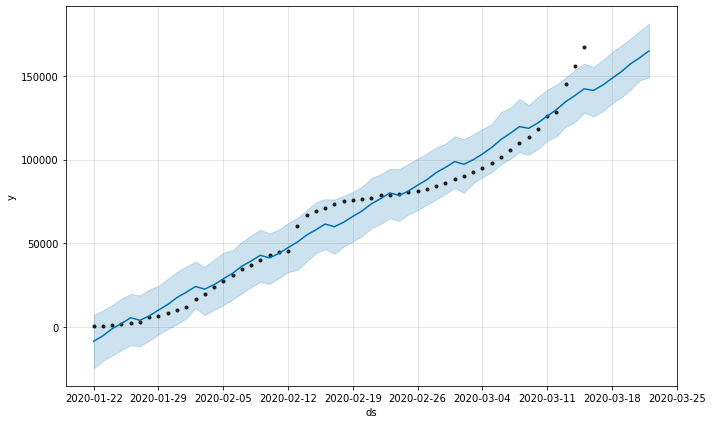

In [121]:
confirmed_forecast_plot = m.plot(forecast)

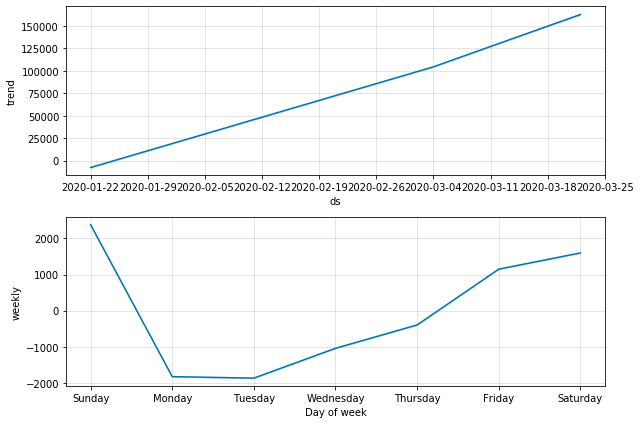

In [122]:
confirmed_forecast_plot =m.plot_components(forecast)

In [123]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [124]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
59,2020-03-21
60,2020-03-22
61,2020-03-23
62,2020-03-24
63,2020-03-25


In [125]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
59,2020-03-21,6770.710027,6400.246160,7177.926709
60,2020-03-22,7011.342323,6564.798172,7426.757243
61,2020-03-23,7094.159684,6686.854968,7501.293712
62,2020-03-24,7300.721064,6875.156501,7741.379104
63,2020-03-25,7539.129851,7129.267378,7956.452846


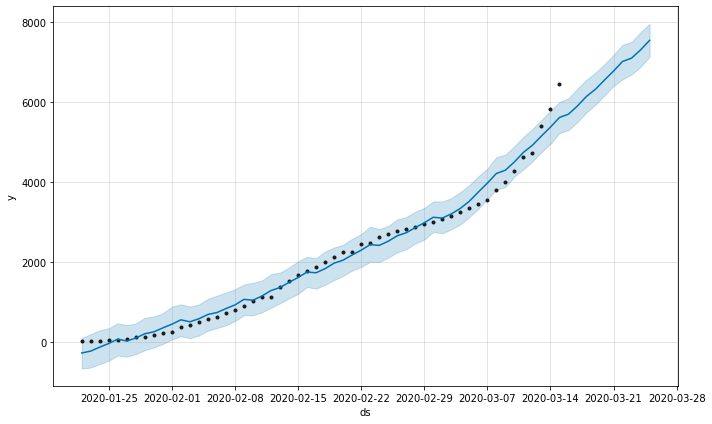

In [126]:
deaths_forecast_plot = m.plot(forecast)

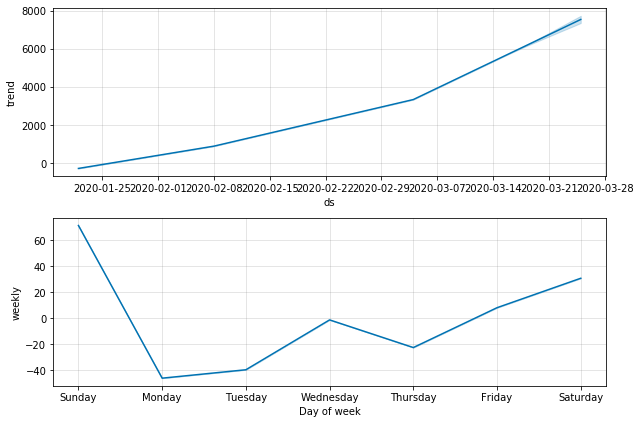

In [127]:
deaths_forecast_plot = m.plot_components(forecast)

In [ ]:

#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

In [3]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
}

NameError: name 'X' is not defined

In [ ]:
type(classifiers)

In [146]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

NameError: name 'Fraud' is not defined